In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# Carregar o arquivo enviado

In [9]:
file_path = 'co2_emissions_kt_by_country.csv'
data = pd.read_csv(file_path)


# Exibir as primeiras linhas do arquivo para entender a estrutura dos dados


In [10]:
print(data.head())

  country_code country_name  year      value
0          ABW        Aruba  1960  11092.675
1          ABW        Aruba  1961  11576.719
2          ABW        Aruba  1962  12713.489
3          ABW        Aruba  1963  12178.107
4          ABW        Aruba  1964  11840.743


In [ ]:
import matplotlib.pyplot as plt

# Filtrar dados para evitar valores negativos nas emissões
data_cleaned = data[data['value'] > 0]

# Gráfico 1: Emissões globais totais por ano
emissions_by_year = data_cleaned.groupby('year')['value'].sum()

plt.figure(figsize=(10, 6))
plt.plot(emissions_by_year.index, emissions_by_year.values, marker='o', label='Emissões Totais')
plt.title('Emissões Globais de CO₂ ao Longo do Tempo (1960-2019)')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO₂ (mil toneladas)')
plt.grid()
plt.legend()
plt.show()

# Gráfico 2: Top 10 países com maiores emissões médias
top_countries = data_cleaned.groupby('country_name')['value'].mean().nlargest(10)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Países com Maiores Emissões Médias de CO₂ (1960-2019)')
plt.ylabel('Emissões Médias de CO₂ (mil toneladas)')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


# Resumo estatístico das emissões de CO2


In [6]:
data_summary = data['value'].describe()

# Verificar os anos disponíveis e o intervalo temporal


In [7]:
years_range = (data['year'].min(), data['year'].max())


# Contar o número de países únicos


In [8]:
unique_countries = data['country_name'].nunique()

data_summary, years_range, unique_countries

(count    1.395300e+04
 mean     8.254983e+05
 std      2.788923e+06
 min     -8.067400e+01
 25%      1.100000e+03
 50%      1.390000e+04
 75%      1.642779e+05
 max      3.434401e+07
 Name: value, dtype: float64,
 (1960, 2019),
 256)

# Filtrar dados para evitar valores negativos nas emissões


In [11]:
data_cleaned = data[data['value'] > 0]

# Gráfico 1: Emissões globais totais por ano

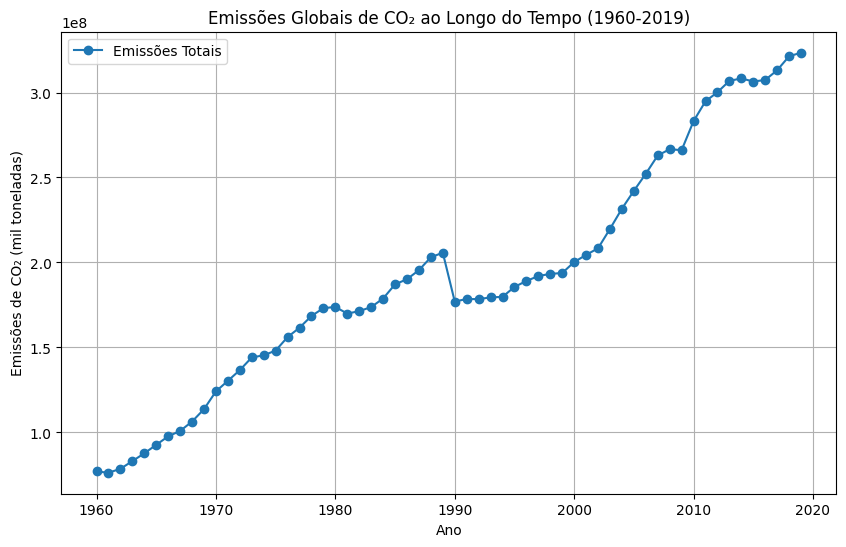

In [12]:
emissions_by_year = data_cleaned.groupby('year')['value'].sum()

plt.figure(figsize=(10, 6))
plt.plot(emissions_by_year.index, emissions_by_year.values, marker='o', label='Emissões Totais')
plt.title('Emissões Globais de CO₂ ao Longo do Tempo (1960-2019)')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO₂ (mil toneladas)')
plt.grid()
plt.legend()
plt.show()

# Gráfico 2: Top 10 países com maiores emissões médias

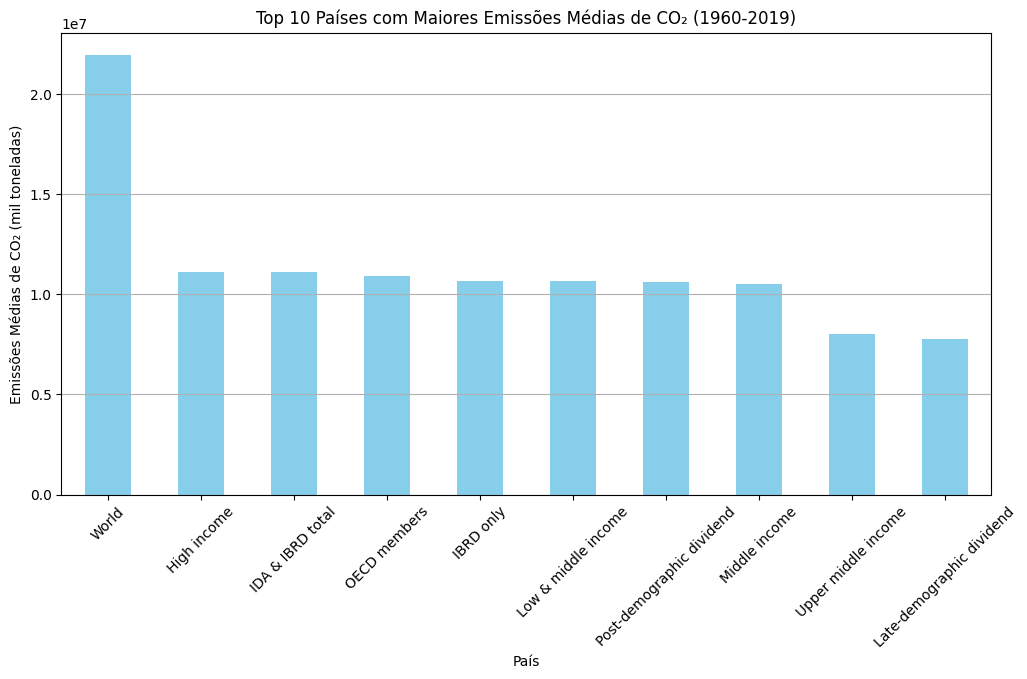

In [13]:
top_countries = data_cleaned.groupby('country_name')['value'].mean().nlargest(10)

plt.figure(figsize=(12, 6))
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Países com Maiores Emissões Médias de CO₂ (1960-2019)')
plt.ylabel('Emissões Médias de CO₂ (mil toneladas)')
plt.xlabel('País')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# Gráfico 3 Refinado: Top 15 países com as maiores emissões médias de CO₂ (1960-2019)


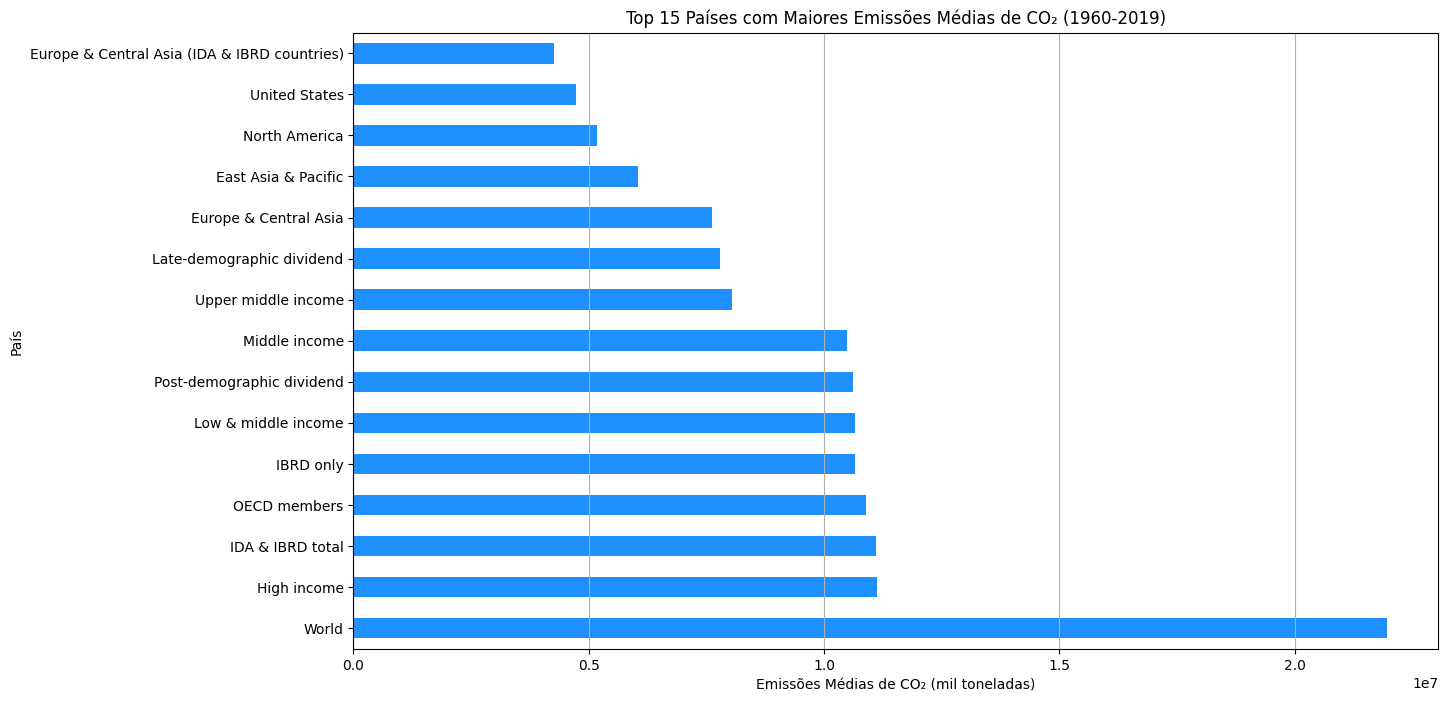

In [15]:
top_15_countries = data_cleaned.groupby('country_name')['value'].mean().nlargest(15)

plt.figure(figsize=(14, 8))
top_15_countries.plot(kind='barh', color='dodgerblue')
plt.title('Top 15 Países com Maiores Emissões Médias de CO₂ (1960-2019)')
plt.xlabel('Emissões Médias de CO₂ (mil toneladas)')
plt.ylabel('País')
plt.grid(axis='x')
plt.show()

# Gráfico 4: Emissões de CO₂ por país no ano de 2019 (último ano do dataset)

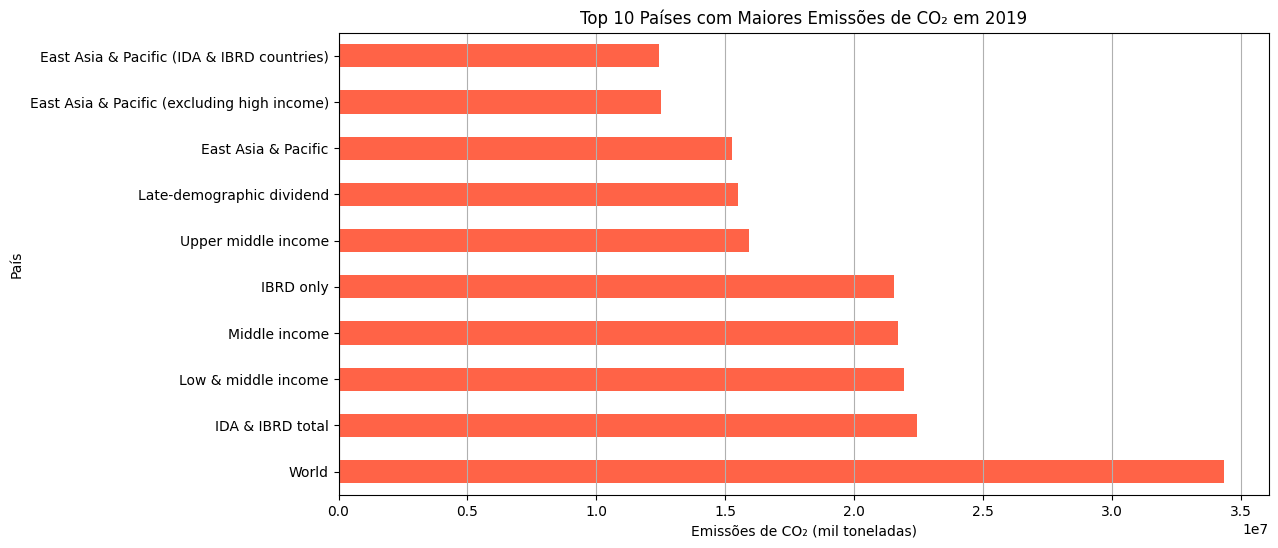

In [14]:
emissions_2019 = data_cleaned[data_cleaned['year'] == 2019].groupby('country_name')['value'].sum().nlargest(10)

plt.figure(figsize=(12, 6))
emissions_2019.plot(kind='barh', color='tomato')
plt.title('Top 10 Países com Maiores Emissões de CO₂ em 2019')
plt.xlabel('Emissões de CO₂ (mil toneladas)')
plt.ylabel('País')
plt.grid(axis='x')
plt.show()

# Gráfico 5: Evolução das emissões de CO₂ para os 5 principais países (2010-2019)


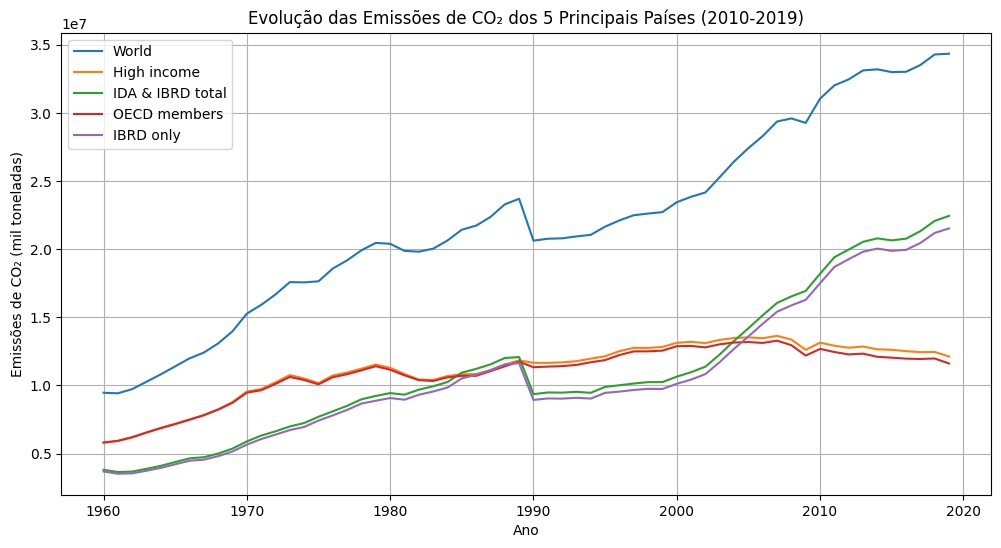

In [16]:
top_5_countries = top_15_countries.index[:5]
emissions_top_5 = data_cleaned[data_cleaned['country_name'].isin(top_5_countries)]

plt.figure(figsize=(12, 6))
for country in top_5_countries:
    country_data = emissions_top_5[emissions_top_5['country_name'] == country]
    plt.plot(country_data['year'], country_data['value'], label=country)

plt.title('Evolução das Emissões de CO₂ dos 5 Principais Países (2010-2019)')
plt.xlabel('Ano')
plt.ylabel('Emissões de CO₂ (mil toneladas)')
plt.legend()
plt.grid(True)
plt.show()

#Modelos Preditivos (Entrega 3)

# Importando as bibliotecas necessárias para Machine Learning


In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression



# Preparação de dados para os modelos
# Primeiro, vamos verificar as colunas relevantes para análise

# Exemplo de dados fictícios para a criação de variáveis:
# Em um cenário real, você usaria dados sobre adoção de energia renovável e a redução das emissões.
# Para fins de exemplo, criamos uma coluna simulada para isso.


In [35]:
data_cleaned['energy_renewable'] = data_cleaned['value'] * 0.1  # Percentual simulado de energia renovável
data_cleaned['efficiency_policy'] = data_cleaned['year'] % 2

# Vamos preparar as variáveis para os modelos


In [34]:
X = data_cleaned[['energy_renewable', 'year']]  # Variáveis independentes: energia renovável e ano
y = data_cleaned['value']  # Variável dependente: emissões de CO₂

# Dividindo em dados de treino e teste

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Normalizando os dados


In [37]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Modelo de Regressão Linear (para prever redução de emissões de CO₂)


In [38]:
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

# Previsão e avaliação do modelo


In [39]:
y_pred = regressor.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

# Modelo de Classificação: Classificando regiões por políticas de eficiência energética (exemplo simples)


In [40]:
label_encoder = LabelEncoder()
data_cleaned['efficiency_policy'] = label_encoder.fit_transform(data_cleaned['efficiency_policy'])

In [41]:
X_classification = data_cleaned[['energy_renewable', 'year']]
y_classification = data_cleaned['efficiency_policy']

# Dividindo em dados de treino e teste para classificação


In [42]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

# Modelo de Classificação (Logistic Regression como exemplo)


In [43]:
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_class, y_train_class)


LogisticRegression(max_iter=1000)

# Previsão e avaliação do modelo de classificação


In [44]:
y_class_pred = classifier.predict(X_test_class)
classification_accuracy = accuracy_score(y_test_class, y_class_pred)

# Modelo de Clusterização: KMeans para identificar padrões de adoção de tecnologias limpas


In [45]:
kmeans = KMeans(n_clusters=3, random_state=42)
data_cleaned['cluster'] = kmeans.fit_predict(X[['energy_renewable', 'year']])

# Resultado das métricas


In [46]:
mse, classification_accuracy, data_cleaned[['country_name', 'cluster']].head()


(2.2039656003850792e-18,
 0.49808612440191385,
   country_name  cluster
 0        Aruba        0
 1        Aruba        0
 2        Aruba        0
 3        Aruba        0
 4        Aruba        0)

In [50]:
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


# Exemplo de dados fictícios
data = {
    'ano': [2010, 2011, 2012, 2013, 2014],
    'energia_renovavel': [20, 22, 24, 28, 30],
    'emissoes_co2': [150, 145, 140, 130, 120]
}
df = pd.DataFrame(data)

# X são as características (por exemplo, o ano e a energia renovável)
X = df[['ano', 'energia_renovavel']]  # Essas são as variáveis independentes

# y é o alvo (emissões de CO2)
y = df['emissoes_co2']  # Variável dependente (o que queremos prever)

# Normalizando os dados (é uma boa prática antes de usar regressão)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Criando e treinando o modelo de regressão
regressor = LinearRegression()
regressor.fit(X_scaled, y)

# Salvando o modelo em um arquivo .pkl
with open('regression_model.pkl', 'wb') as f:
    pickle.dump(regressor, f)

# Salvando o scaler (caso precise do mesmo pré-processamento na API)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)


#Modelo de Classificação (RandomForestClassifier)

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Exemplo de dados fictícios para um modelo de classificação
data_classification = {
    'regiao': ['Norte', 'Sul', 'Leste', 'Oeste', 'Centro'],
    'politicas_eficiencia_energetica': [1, 0, 1, 1, 0],  # 1: Implementada, 0: Não Implementada
    'nivel_eficiencia': [80, 45, 90, 85, 40]  # Nível de eficiência energética em %
}

df_classification = pd.DataFrame(data_classification)

# X são as características (políticas e nível de eficiência)
X_classification = df_classification[['politicas_eficiencia_energetica', 'nivel_eficiencia']]

# y é o alvo (região, que é o que queremos classificar)
y_classification = df_classification['regiao']

# Criando e treinando o modelo de classificação
classifier = RandomForestClassifier()
classifier.fit(X_classification, y_classification)

# Salvando o modelo de classificação
with open('classification_model.pkl', 'wb') as f:
    pickle.dump(classifier, f)


In [52]:
from sklearn.cluster import KMeans

# Exemplo de dados fictícios para clusterização
data_clustering = {
    'regiao': ['Norte', 'Sul', 'Leste', 'Oeste', 'Centro'],
    'tecnologias_limpas': [3, 2, 4, 5, 1],  # Número de tecnologias limpas adotadas
    'emissoes_co2': [150, 200, 120, 90, 250]  # Emissões de CO2 em toneladas
}

df_clustering = pd.DataFrame(data_clustering)

# X é o conjunto de características (tecnologias limpas e emissões de CO2)
X_clustering = df_clustering[['tecnologias_limpas', 'emissoes_co2']]

# Criando e treinando o modelo de clusterização
kmeans = KMeans(n_clusters=3)  # Número de clusters
kmeans.fit(X_clustering)

# Salvando o modelo de clusterização
with open('kmeans_model.pkl', 'wb') as f:
    pickle.dump(kmeans, f)


In [53]:
# Carregar o modelo de regressão salvo
with open('regression_model.pkl', 'rb') as f:
    regressor_loaded = pickle.load(f)

# Carregar o scaler salvo
with open('scaler.pkl', 'rb') as f:
    scaler_loaded = pickle.load(f)

# Testar a previsão com novos dados
test_data = [[2025, 32]]  # Exemplo de novos dados para previsão
scaled_test_data = scaler_loaded.transform(test_data)
predicted_emissions = regressor_loaded.predict(scaled_test_data)

print(f"Previsão de emissões de CO2 para 2025 com 32% de energia renovável: {predicted_emissions[0]}")


Previsão de emissões de CO2 para 2025 com 32% de energia renovável: 105.99999999999989


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [54]:
# Carregar o modelo de classificação salvo
with open('classification_model.pkl', 'rb') as f:
    classifier_loaded = pickle.load(f)

# Testar com novos dados para classificar a região
new_data_classification = [[1, 90]]  # Políticas implementadas e nível de eficiência de 90%
predicted_region = classifier_loaded.predict(new_data_classification)

print(f"A região com essas características é classificada como: {predicted_region[0]}")


A região com essas características é classificada como: Leste


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [55]:
# Carregar o modelo de clusterização salvo
with open('kmeans_model.pkl', 'rb') as f:
    kmeans_loaded = pickle.load(f)

# Testar com novos dados para ver em qual cluster o dado cai
new_data_clustering = [[3, 150]]  # 3 tecnologias limpas e 150 toneladas de CO2
predicted_cluster = kmeans_loaded.predict(new_data_clustering)

print(f"O novo dado pertence ao cluster: {predicted_cluster[0]}")


O novo dado pertence ao cluster: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
